In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [26]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

dataset = [noisy_circles,noisy_moons,blobs]

In [22]:
def plot_scatter(data):
    plt.scatter(data[0][:,0], data[0][:,1], c=data[1])

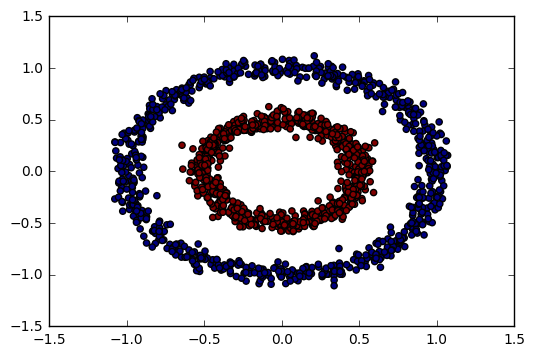

In [23]:
plot_scatter(noisy_circles)

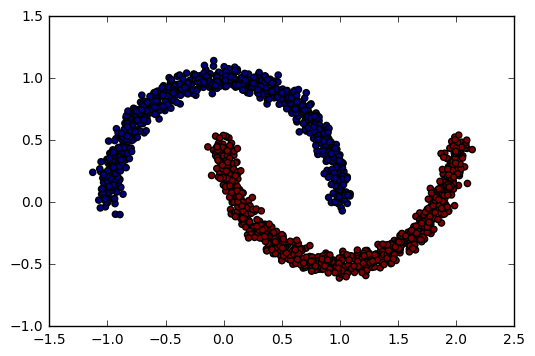

In [24]:
plot_scatter(noisy_moons)

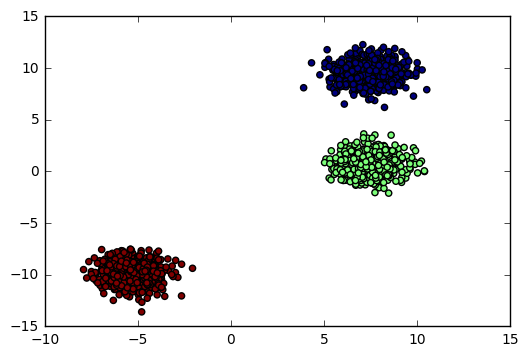

In [19]:
plot_scatter(blobs)

(560,)

C:\Users\smkim\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
C:\Users\smkim\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\smkim\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
C:\Users\smkim\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph 

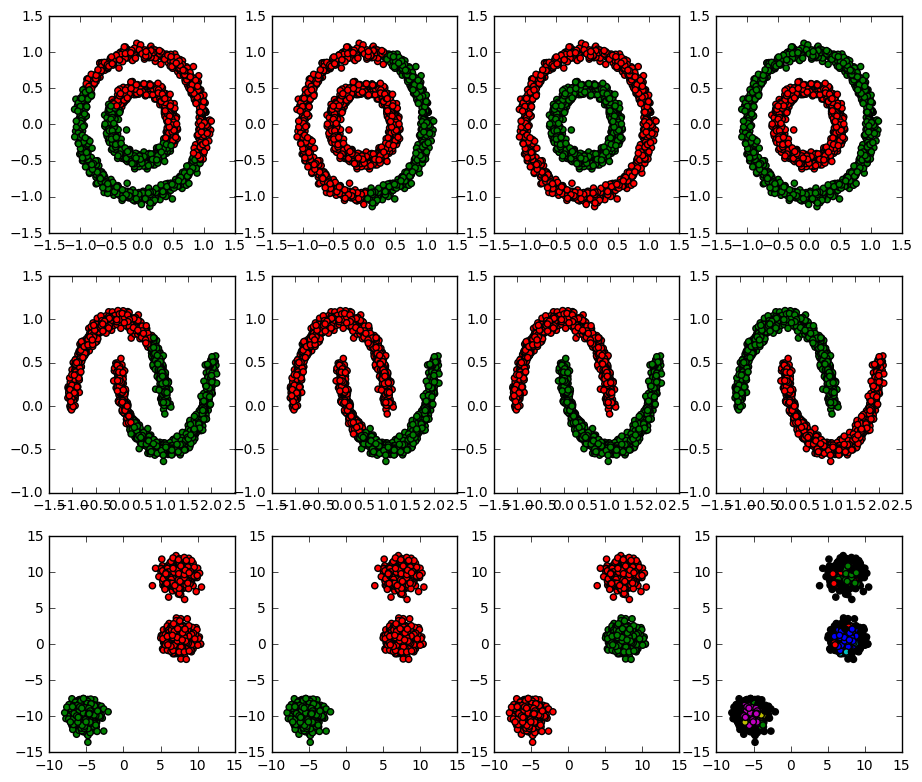

In [58]:
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster

plt.figure(figsize=(4 * 2 + 3, 9.5))
colors = np.array([x for x in 'rgbgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

# create clustering estimators
plot_num = 1
for data in dataset:
    X,y = data
    
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    two_means = cluster.MiniBatchKMeans(n_clusters=2)

    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    
    clt_algs = [two_means, ward, spectral, dbscan]
    
    for clt in clt_algs:
        clt.fit(X)
        y_clt = clt.labels_.astype(np.int)

        plt.subplot(3, 4, plot_num)
        plt.scatter(data[0][:,0], data[0][:,1], c=colors[y_clt])
        plot_num += 1